In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
ehull_e3nn_unrelaxed_held_series = pd.read_json("../../../best_models/e3nn/dft_e_hull_htvs_data_unrelaxed_e3nn/837627/best_0/holdout_set_series_predictions.json")



In [4]:
#https://realpython.com/python-flatten-list/
import numpy as np

def flatten(matrix):
    matrix = list(matrix)
    if isinstance(matrix[0],list):
        out = [item for row in matrix for item in row]
    else:
        out = matrix
    return np.asarray(out)

In [6]:
CHGNet_data_series = np.load("CHGNET_series.npy")

In [7]:
import matplotlib.pyplot as plt
from sklearn import metrics

In [8]:
def get_relative_vals(dataframe,vals):
    
    vals_gs = {}
    out_diffs = []
    
    for i in range(len(dataframe)):
        curr_formula = dataframe.iloc[i].formula
        if curr_formula in vals_gs:
            if vals[i] < vals_gs[curr_formula]:
                vals_gs[curr_formula] = vals[i]
        else:
            vals_gs[curr_formula] = vals[i]
        

    for i in range(len(dataframe)):
        curr_formula = dataframe.iloc[i].formula
        curr_val = vals[i] - vals_gs[curr_formula]
        out_diffs.append(curr_val)
        
        
    return np.asarray(out_diffs)

In [9]:
diffs_dft = get_relative_vals(ehull_e3nn_unrelaxed_held_series,ehull_e3nn_unrelaxed_held_series.dft_e_hull)

CHGNet = get_relative_vals(ehull_e3nn_unrelaxed_held_series,CHGNet_data_series)/40.0


In [10]:
import matplotlib as mpl

In [11]:
print(max(diffs_dft))

print(max(CHGNet))


0.15332972430000003
0.09940242767333984


/tmp/ipykernel_537540/3933337559.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  orig_map=plt.cm.get_cmap('inferno')


0.01785725493325275
-0.608207076117464


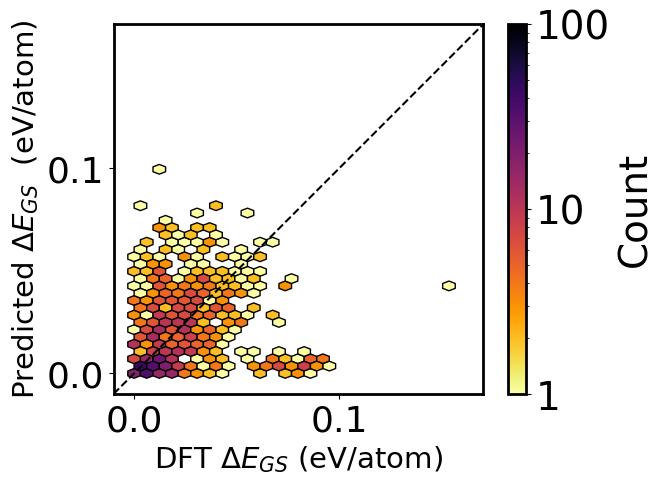

In [13]:
mpl.rcParams['axes.linewidth'] = 2.0

orig_map=plt.cm.get_cmap('inferno')

    # reversing the original colormap using reversed() function
cmap = orig_map.reversed()
im = plt.hexbin(diffs_dft,CHGNet,cmap=cmap,gridsize=25,mincnt=1,bins="log",edgecolor="black")

print(np.mean(np.abs(diffs_dft-CHGNet)))
print(metrics.r2_score(diffs_dft,CHGNet))


plt.plot(np.linspace(-0.01,0.17,100),np.linspace(-0.01,0.17,100),c="black",linestyle="--")
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')

plt.xlim(-0.01,0.17)
plt.ylim(-0.01,0.17)


plt.xlabel("DFT $\Delta E_{GS}$ (eV/atom)",size=21)
plt.ylabel("Predicted $\Delta E_{GS}$  (eV/atom)",size=21)
plt.xticks([0.0,0.1],size=26)
plt.yticks([0.0,0.1],size=26)
#im.figure.axes[0].tick_params(axis="both", labelsize=15)

cbar = plt.colorbar()
plt.clim(1,100)
cbar.set_ticks(ticks = [1,10,100],labels=[1,10,100],fontsize=28)
cbar.set_label(label="Count",size=28)
#plt.savefig("e3nn_ensemble_unrelaxed_diff.pdf",bbox_inches="tight")